In [1]:
import pandas as pd
import numpy as np

# Finance Library import
import os
import sys
sys.path.append("C:\\DualMomentum\\BackTesting")
from Library import FinanceLibrary as fl

In [2]:
df = pd.read_csv("..\\Data\\KODEX200_data.csv", encoding="utf-8", engine="python")

In [3]:
df.index = pd.to_datetime(df["Date"])
df = df["2017"]
df = df[["High","Low","Close"]]

atr = fl.ATR(df["High"],df["Low"],df["Close"])
atr.name = "ATR"
df = pd.concat([df,atr],axis=1)

In [48]:
# ATR 배수값
AtrMulti = 3
# 진입 Flag
Entry = 0  # "1"이면 진입

df["Max"] = df["Close"].rolling(window=30,min_periods=1).max()
df["Min"] = df["Close"].rolling(window=30,min_periods=1).min()
df["MaxHigh"] = df["Max"] - df["ATR"] * AtrMulti
df["MinLow"] = df["Min"] + df["ATR"] * AtrMulti
df["ATR_Close 비율"] = df["ATR"]/df["Close"] * 100

In [50]:
df.head()

,High,Low,Close,ATR,Max,Min,MaxHigh,MinLow,ATR_Close 비율
Date,,,,,,,,,
2017-01-02,25442,25195,25377,NaN,25377.0,25377.0,NaN,NaN,NaN
2017-01-03,25577,25409,25579,243.0,25579.0,25377.0,24850.0,26106.0,0.949998
2017-01-04,25615,25552,25608,212.0,25608.0,25377.0,24972.0,26013.0,0.827866
2017-01-05,25601,25494,25507,166.0,25608.0,25377.0,25110.0,25875.0,0.650802
2017-01-06,25663,25557,25617,156.0,25617.0,25377.0,25149.0,25845.0,0.608971


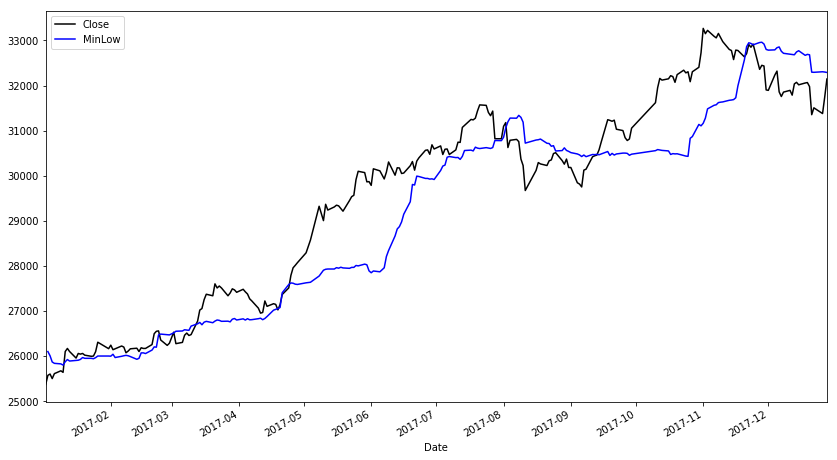

In [32]:
import matplotlib.pyplot as plt

df["Close"].plot(color="Black",figsize=(14,8),label="Close")
#df["MaxHigh"].plot(color="Red",figsize=(14,8), label="MaxHigh")
df["MinLow"].plot(color="Blue",figsize=(14,8), label="MinLow")
plt.legend()

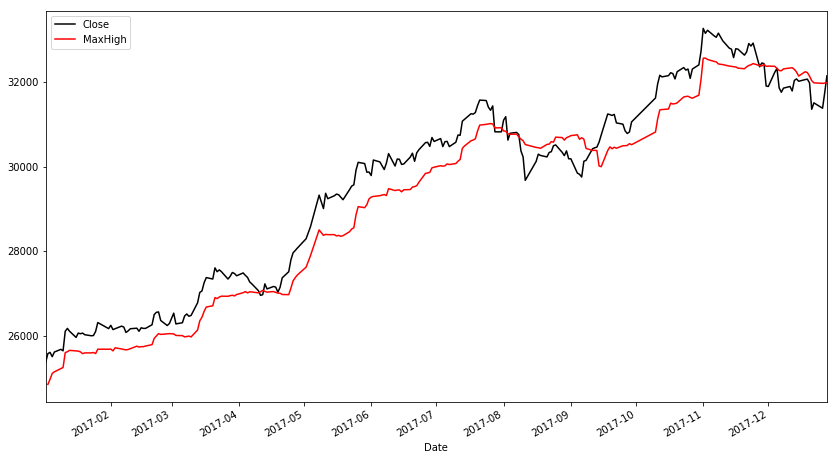

In [33]:
df["Close"].plot(color="Black",figsize=(14,8),label="Close")
df["MaxHigh"].plot(color="Red",figsize=(14,8), label="MaxHigh")
#df["MinLow"].plot(color="Blue",figsize=(14,8), label="MinLow")
plt.legend()